In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Library yang dibutuhkan**

In [3]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [4]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_DeepL_1_En.csv")
df.head()

,userName,score,at,content
0,Vitaly,5,2024-05-31 22:09:23,Cool app 😎 👍
1,Moises Meza Pariona,5,2024-05-31 18:55:03,Very god. I'm like very much
2,Eddy Castillo,5,2024-05-31 17:45:28,"Excellent, accurate."
3,Shrouk Sobhy,1,2024-05-31 17:13:12,This is completely annoying. Doesn't deserve n...
4,Eugeniu Babin,5,2024-05-31 13:10:59,perfekt !


In [5]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Cool app 😎 👍,Vitaly,2024-05-31 22:09:23
1,Very god. I'm like very much,Moises Meza Pariona,2024-05-31 18:55:03
2,"Excellent, accurate.",Eddy Castillo,2024-05-31 17:45:28
3,This is completely annoying. Doesn't deserve n...,Shrouk Sobhy,2024-05-31 17:13:12
4,perfekt !,Eugeniu Babin,2024-05-31 13:10:59
...,...,...,...
194,Great for on the go translation.,Kay Kerr,2024-05-09 13:11:20
195,After DeepL just can't use any other app for t...,Margaryta Popova,2024-05-09 12:54:37
196,So much better than Google & Co!,Michael Skibinski,2024-05-09 11:03:58
197,Great,Hamza Alradhi,2024-05-09 10:55:54


In [6]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [7]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,196,199,199
top,Very accurate,Vitaly,2024-05-31 22:09:23
freq,2,1,1


# **Cleaning Data & Case Folding**

In [8]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [9]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [10]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [11]:
# Menghapus data yang kosong
df = df.dropna()

In [12]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [13]:
df.shape

(196, 3)

# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [42]:
# Ensure you have the necessary nltk resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
# 1. Normalisasi

def normalize_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  text = text.lower()

  return text

In [44]:
def remove_emojis(text): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

In [45]:
# 2. Stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [46]:
# 3. Tokenize

def tokenize_text(text):
    return word_tokenize(text)

In [47]:
# 4. Stemming

def stem_words(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

In [49]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_DeepL_1_En.csv")
df

,userName,score,at,content
0,Vitaly,5,2024-05-31 22:09:23,Cool app 😎 👍
1,Moises Meza Pariona,5,2024-05-31 18:55:03,Very god. I'm like very much
2,Eddy Castillo,5,2024-05-31 17:45:28,"Excellent, accurate."
3,Shrouk Sobhy,1,2024-05-31 17:13:12,This is completely annoying. Doesn't deserve n...
4,Eugeniu Babin,5,2024-05-31 13:10:59,perfekt !
...,...,...,...,...
194,Kay Kerr,5,2024-05-09 13:11:20,Great for on the go translation.
195,Margaryta Popova,5,2024-05-09 12:54:37,After DeepL just can't use any other app for t...
196,Michael Skibinski,5,2024-05-09 11:03:58,So much better than Google & Co!
197,Hamza Alradhi,5,2024-05-09 10:55:54,Great


In [50]:
# Assume the text column is named 'text'

def preprocess_content(text):
    normalized_text = normalize_text(text)
    text_without_stopwords = remove_stopwords(normalized_text)
    tokens = tokenize_text(text_without_stopwords)
    stemmed_tokens = stem_words(tokens)
    return ' '.join(stemmed_tokens)

In [51]:
# Apply preprocessing to the Content Column

df['content'] = df['content'].apply(preprocess_content)

In [54]:
# Save the DataFrame with the processed text to a new CSV file

df.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_DeepL_1_En.csv', index = False)

In [55]:
# Read Dataset Hasil Preprocessing

df = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_DeepL_1_En.csv', encoding = 'latin1')
df

,userName,score,at,content
0,Vitaly,5,2024-05-31 22:09:23,cool app
1,Moises Meza Pariona,5,2024-05-31 18:55:03,god im like much
2,Eddy Castillo,5,2024-05-31 17:45:28,excel accur
3,Shrouk Sobhy,1,2024-05-31 17:13:12,complet annoy doesnt deserv even star
4,Eugeniu Babin,5,2024-05-31 13:10:59,perfekt
...,...,...,...,...
194,Kay Kerr,5,2024-05-09 13:11:20,great go translat
195,Margaryta Popova,5,2024-05-09 12:54:37,deepl cant use app translat
196,Michael Skibinski,5,2024-05-09 11:03:58,much better googl co
197,Hamza Alradhi,5,2024-05-09 10:55:54,great


# **Labeling**

In [60]:
df = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_DeepL_1_En.csv')
df

,userName,score,at,content
0,Vitaly,5,2024-05-31 22:09:23,cool app
1,Moises Meza Pariona,5,2024-05-31 18:55:03,god im like much
2,Eddy Castillo,5,2024-05-31 17:45:28,excel accur
3,Shrouk Sobhy,1,2024-05-31 17:13:12,complet annoy doesnt deserv even star
4,Eugeniu Babin,5,2024-05-31 13:10:59,perfekt
...,...,...,...,...
194,Kay Kerr,5,2024-05-09 13:11:20,great go translat
195,Margaryta Popova,5,2024-05-09 12:54:37,deepl cant use app translat
196,Michael Skibinski,5,2024-05-09 11:03:58,much better googl co
197,Hamza Alradhi,5,2024-05-09 10:55:54,great


In [62]:
# Drop the specified columns
df2 = df.drop(columns=['userName', 'score', 'at'])
df2

,content
0,cool app
1,god im like much
2,excel accur
3,complet annoy doesnt deserv even star
4,perfekt
...,...
194,great go translat
195,deepl cant use app translat
196,much better googl co
197,great


In [65]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud


In [66]:
# Labeling With TextBlob

from textblob import TextBlob

In [67]:
data_review = list(df2['content'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 90
Netral = 96
Negatif = 13

Total Data Seluruhnya : 199


In [68]:
df2['sentimen'] = status
df2

,content,sentimen
0,cool app,Positif
1,god im like much,Positif
2,excel accur,Netral
3,complet annoy doesnt deserv even star,Netral
4,perfekt,Netral
...,...,...
194,great go translat,Positif
195,deepl cant use app translat,Netral
196,much better googl co,Positif
197,great,Positif


In [71]:
df2 = df2.fillna(method = 'pad')
df2

,content,sentimen
0,cool app,Positif
1,god im like much,Positif
2,excel accur,Netral
3,complet annoy doesnt deserv even star,Netral
4,perfekt,Netral
...,...,...
194,great go translat,Positif
195,deepl cant use app translat,Netral
196,much better googl co,Positif
197,great,Positif


# **Visualisasi**


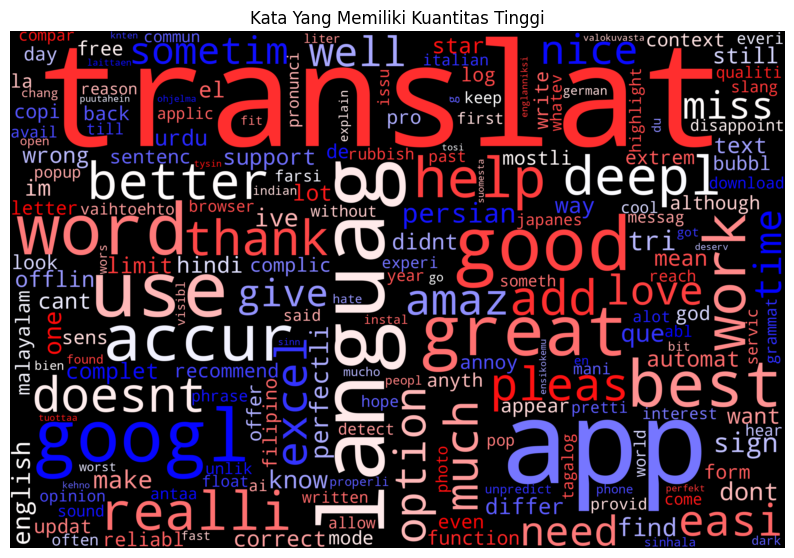

In [72]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


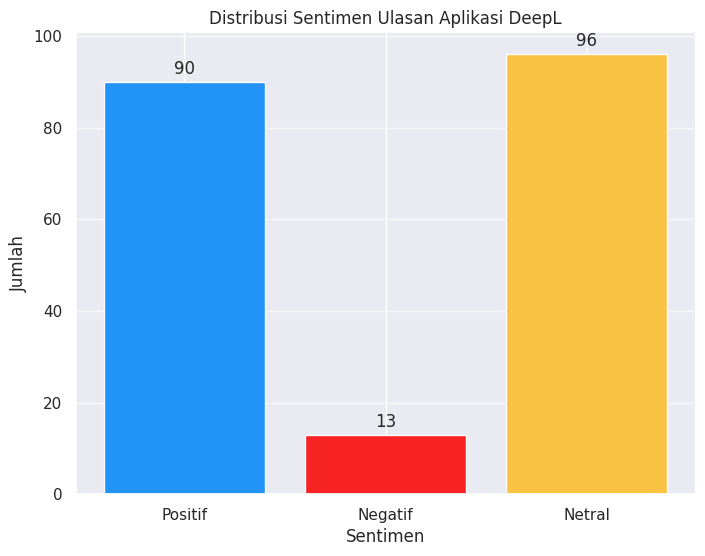

In [73]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi DeepL")


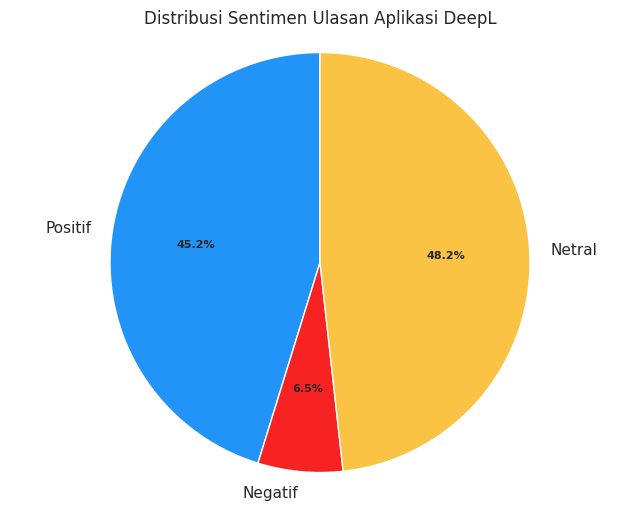

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi DeepL")

In [77]:
# Menghapus Sentimen Netral
data = df2[df2['sentimen'] != 'Netral']
data

,content,sentimen
0,cool app,Positif
1,god im like much,Positif
7,great,Positif
8,nice,Positif
9,get star caus there offlin option otherwis bes...,Positif
...,...,...
192,doesnt support world popular languag,Positif
193,translat r excel probabl best featur app lag b...,Positif
194,great go translat,Positif
196,much better googl co,Positif


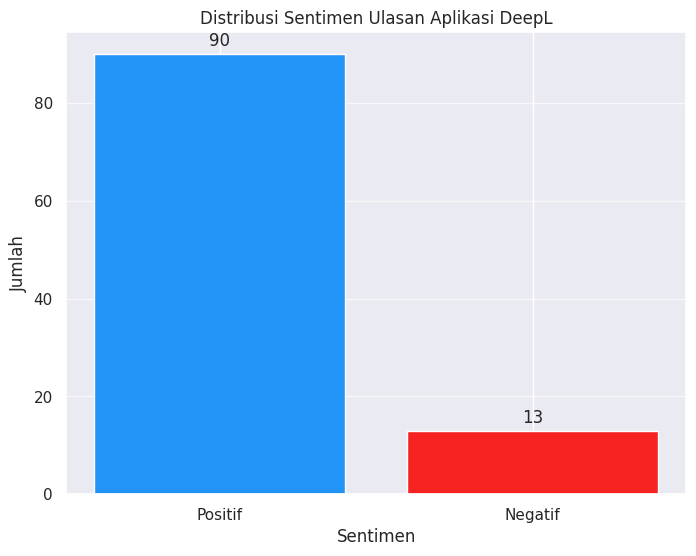

In [79]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi DeepL")


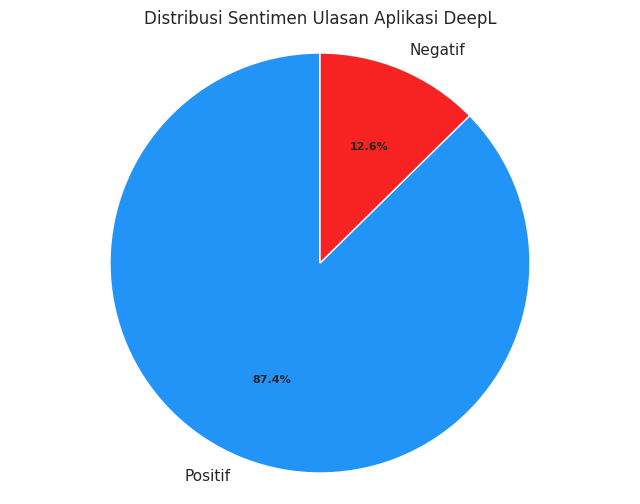

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi DeepL")

In [81]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,sentimen
0,cool app,1
1,god im like much,1
7,great,1
8,nice,1
9,get star caus there offlin option otherwis bes...,1
...,...,...
192,doesnt support world popular languag,1
193,translat r excel probabl best featur app lag b...,1
194,great go translat,1
196,much better googl co,1


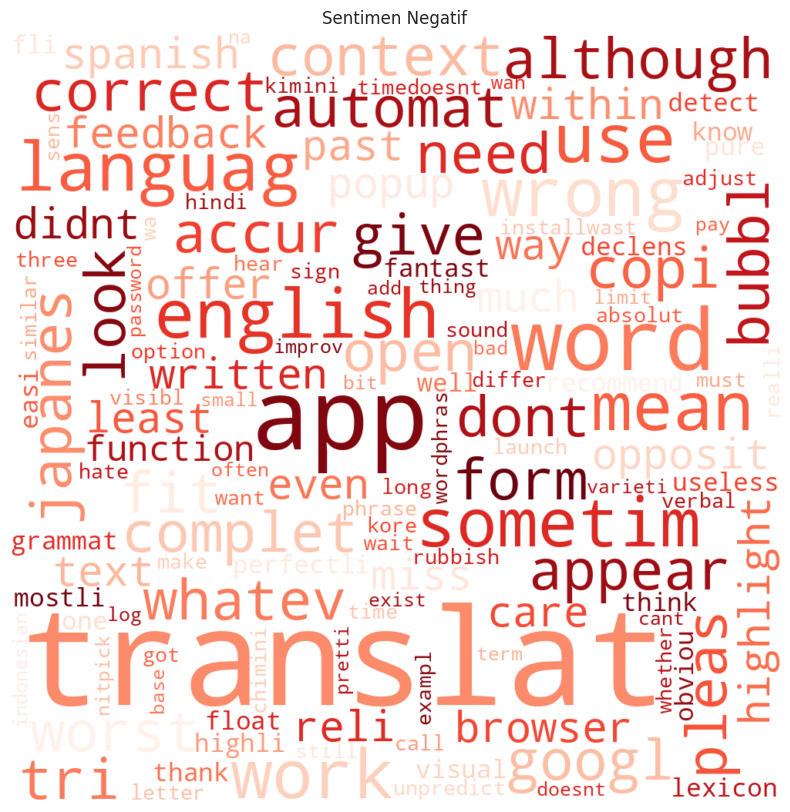

In [82]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

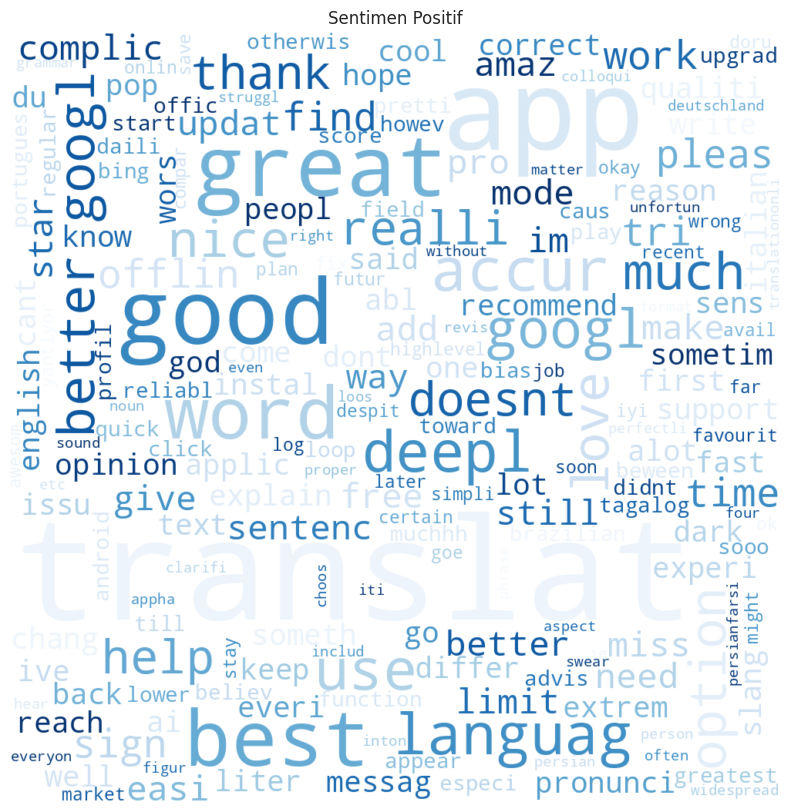

In [83]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [84]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif
data['sentimen'].value_counts()

sentimen
1    90
0    13
Name: count, dtype: int64

# **Data Preparation**

In [85]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [106]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [107]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

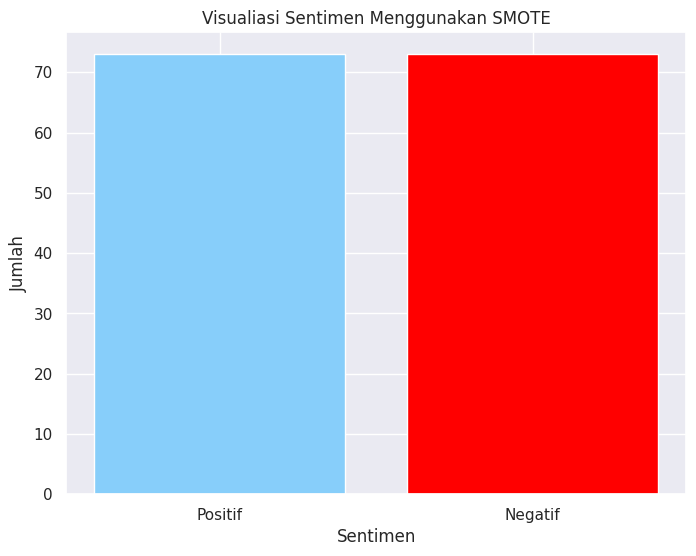

In [108]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue', 'orange'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [109]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [110]:
y_pred = naive_bayes.predict(X_test_vec)

In [111]:
import warnings
warnings.filterwarnings('ignore')

In [112]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8571428571428571

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.67      0.50      0.57         4
     Positif       0.89      0.94      0.91        17

    accuracy                           0.86        21
   macro avg       0.78      0.72      0.74        21
weighted avg       0.85      0.86      0.85        21



In [113]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 2  2]
 [ 1 16]]

Accuracy =  0.8571428571428571


In [114]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 2  2]
 [ 1 16]]

True Positives (TP) =  2

True Negatives (TN) =  16

False Positives (FP) =  2

False Negatives (FN) =  1

Accuracy =  0.8571428571428571


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

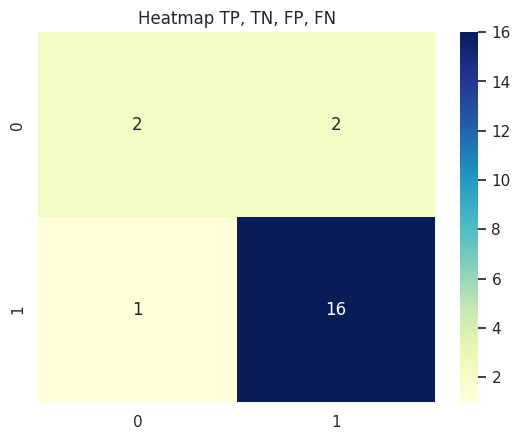

In [115]:
cm_matrix = pd.DataFrame(data=cm, columns=['0', '1'],
                         index=['0', '1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [116]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [117]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8571


In [118]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1429


# **Testing**


In [121]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : This app is very good. It can help us to translate other languages. It also helps me to learn new languages and the correct use of words in sentences when using other languages.
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 99.76%
Probabilitas: 99.76025483377585 %


In [124]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : Very disappointing, when trying to translate, it crashed and took forever to load.
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 50.00%
Probabilitas: 50.0 %
